In [ ]:
#  מבחן השלמת משימות

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [ ]:
#    חלק ב'
#   פייטון-
#   .4 לפניך רשימת סקר מדגם מסעיף :3
#    גם בלינק
#    https://github.com/pythonai170624/exam/blob/main/seker.py

In [6]:
data = [
    {"cust_id": 1, "timestamp": "2024-01-01", "residence": "Tel Aviv", "grade": 8},
    {"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": None},
    {"cust_id": 1, "timestamp": "2024-01-03", "residence": "Tel Aviv", "grade": 8},
    {"cust_id": 3, "timestamp": "2024-01-04", "residence": None, "grade": 7},
    {"cust_id": 2, "timestamp": "2024-01-05", "residence": "Jerusalem", "grade": None}
]

unique_data = []
seen_cust_ids = set();

for entry in data:
    if entry["cust_id"] not in seen_cust_ids:
        unique_data.append(entry);
        seen_cust_ids.add(entry["cust_id"]);

print("Unique data:");
print(unique_data);


Unique data:
[{'cust_id': 1, 'timestamp': '2024-01-01', 'residence': 'Tel Aviv', 'grade': 8}, {'cust_id': 2, 'timestamp': '2024-01-02', 'residence': 'Jerusalem', 'grade': None}, {'cust_id': 3, 'timestamp': '2024-01-04', 'residence': None, 'grade': 7}]


In [ ]:
#   כתוב קוד )ללא שימוש בספריית PD )אשר מוחק כפילויות עבור אותו הלקוח, ומשאיר רק את המופע הראשון

In [7]:
filtered_data = [entry for entry in unique_data if None not in entry.values()]

print("Filtered data (without None values):");
print(filtered_data);


Filtered data (without None values):
[{'cust_id': 1, 'timestamp': '2024-01-01', 'residence': 'Tel Aviv', 'grade': 8}]


In [ ]:
# כתוב קוד )ללא שימוש בספריית PD )אשר מוחק כל שורה שיש בתוכה את הערך None

In [8]:
grades = [entry["grade"] for entry in filtered_data if entry["grade"] is not None]
average_grade = sum(grades) / len(grades) if grades else 0

for entry in filtered_data:
    if entry["grade"] is None:
        entry["grade"] = average_grade

print("Data with None grades replaced by average:");
print(filtered_data);


Data with None grades replaced by average:
[{'cust_id': 1, 'timestamp': '2024-01-01', 'residence': 'Tel Aviv', 'grade': 8}]


In [ ]:
#################################################################################################
#################################################################################################

In [ ]:
# חלק ג'
# הכנת מידע
# לפניך קבצי המידע הבאים:
# Customers.csv, Items.csv, order_item.csv, orders.csv

In [14]:
file_path = r'C:\users\HP\exam\Items.csv'
df_Items = pd.read_csv(file_path);
df_Items

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True
6,28,Camera,NaN,695.71,NaN,Sony,False
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True


In [ ]:
##############################################################################################################

In [ ]:
#####        6 מחיקת כפילויות
# בטבלת items קיימים מוצרים שמופיעים מספר פעמים )מוצר עם אותו השם(
# והוחלט לשמור במוצרים בעלי אותו שם, את המוצר עם הכי הרבה
# פרטים null-not, ואת היתר למחוק.
# רמז: )עקוב אחרי הדוגמא שעשינו בשיעור ויישם אותה כאן(, דרך פעולה-
# - הוסף עמודה חדשה הסופרת כמה ערכי null-not יש בכל שורה
# - מיין לפי שם המוצר + העמודה החדשה שייצרת, מהגדול לקטן
# - הסר את הכפילויות לפי שם המוצר )שמור רק את המופע הראשון(

In [11]:
df_Items['not_null_count'] = df_Items.notna().sum(axis=1)-1
df_Items.sort_values(["item_name","not_null_count"],inplace=True,ascending=[False,False]);
display(df_Items.drop_duplicates(subset=['item_name'], keep='first'));


,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,not_null_count
49,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,6
48,35,Wi-Fi Router,Network Equipment,3812.53,14.0,Microsoft,True,6
47,29,Webcam,Printers and Office Equipment,4227.36,596.0,Dell,True,6
45,12,Video Game Console,Gaming Equipment,689.61,753.0,Microsoft,True,6
44,13,Video Game,NaN,1890.03,681.0,Lenovo,True,5
46,41,VR Headset,NaN,1905.01,1367.0,JBL,True,5
43,22,USB Flash Drive,NaN,1150.87,1251.0,Panasonic,True,5
40,1,Television,Televisions and Displays,356.81,1009.0,JBL,True,6
39,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,6
37,33,Surge Protector,Printers and Office Equipment,488.39,800.0,ASUS,True,6


In [ ]:
# 7) *אתגר: עלות קניות לפי לאום. כלומר- נסכום את סך עלות הקניות
# שנעשו לכל המוצרים עבור כל לקוח, נחבר ביחד את כל קניית הלקוחות
# מאותו לאו ם – ואז נראה כמה עלות יש פר לאום

In [27]:
file_path = r'C:\users\HP\exam\order_item.csv'
df_order_item = pd.read_csv(file_path);

most_null_row = df_order_item[df_order_item['item_id'].isnull()]['id'].value_counts().idxmax();
duplicates = df_order_item[df_order_item.duplicated('id', keep=False)]
df_order_item.loc[df_order_item['id'].isin(duplicates['id']), 'id'] = most_null_row

print(df_order_item.head());


   id  order_id  item_id  quantity
0   1       337     10.0         2
1   2       430     27.0         6
2   3       430     36.0         2
3   4       508     46.0         1
4   5       229     27.0         2


In [ ]:
#######################################################################################

In [ ]:
# 9 *אתגר: מחק מטבלת item_order את כל המכירות של הלקוחות שהסרת בסעיף הקודם

In [17]:
file_path = r'C:\users\HP\exam\order_item.csv'
df_order_item = pd.read_csv(file_path);
print(df_order_item);

file_path = r'C:\users\HP\exam\customers.csv'
df_customers = pd.read_csv(file_path);
print(df_customers);

missing_values = df_customers.isnull().sum(axis=1);
customers_to_remove = df_customers[missing_values >= 3]['id']

print("\nCustomers to remove:");
print(customers_to_remove);
#####################################################################################

df_order_item_cleaned = df_order_item[~df_order_item['id'].isin(customers_to_remove)]

print("\nUpdated order_item table (after removing sales for deleted customers):");
print(df_order_item_cleaned.head());


       id  order_id  item_id  quantity
0       1       337     10.0         2
1       2       430     27.0         6
2       3       430     36.0         2
3       4       508     46.0         1
4       5       229     27.0         2
..    ...       ...      ...       ...
995   996       594     24.0         2
996   997       330     32.0         8
997   998       472     10.0         3
998   999       222     29.0         1
999  1000       337     16.0         1

[1000 rows x 4 columns]
      id first_name  last_name  gender   age   nationallity joining_date  \
0      1      Eadie     Maffeo  Female  41.0         France   11/01/2022   
1      2     Hammad  Brewerton    Male  56.0         Isreal   30/09/2022   
2      3    Terrell       Bris    Male  43.0          India          NaN   
3      4    Frannie   Morewood    Male  84.0         France   26/05/2021   
4      5      Sophi      Fleet  Female  33.0         Sweden   19/07/2021   
..   ...        ...        ...     ...   ...       

In [ ]:
##########################################################################
##########################################################################

In [ ]:
# חקור והצג בגרף את הפרטים הבאים:
# המלצה: הסר שורות עם ערכים ריקים

# 3( הסטוגרמת פילוג לקוחות לפי גיל
# 4( גרף המציג כמות לקוחות חדשים שהצטרפו, לפי שנים
# 5( גרף המציג כמות מכירות לפי חודשים
# 6( הסטוגרמת פילוג כמות קניות לפי גיל )יש להחשיב כל קניה בספירה
# אחת. אין צורך לספור כמות מוצרים וכו'( – האם יש מגמה ליותר/פחות
# קניה בטווחי גיל מסויימים?


In [ ]:
##################################################
#    המלצה: הסר שורות עם ערכים ריקים

In [22]:
df_customers_clean = df_customers.dropna();
df_order_item_clean = df_order_item.dropna();

In [ ]:
###############################################

In [ ]:
# 3 הסטוגרמת פילוג לקוחות לפי גיל


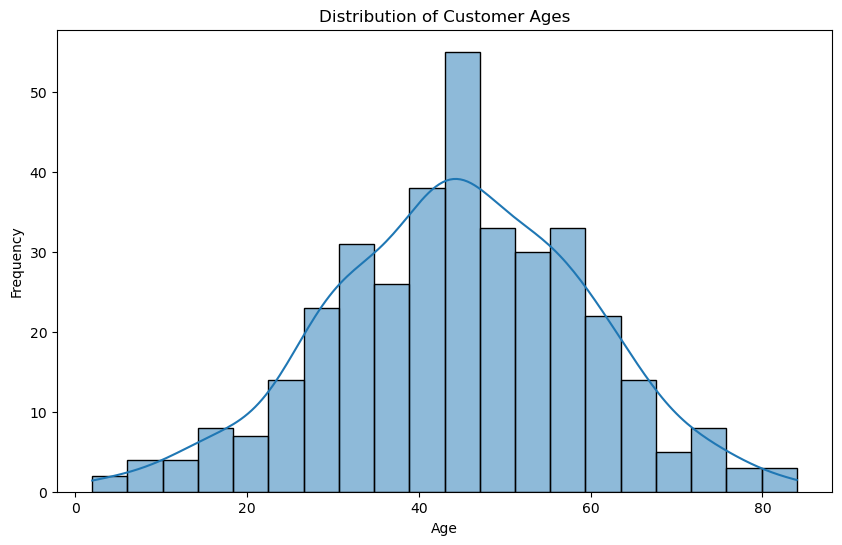

In [23]:
plt.figure(figsize=(10, 6));
sns.histplot(df_customers_clean['age'], bins=20, kde=True);
plt.title('Distribution of Customer Ages');
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.show();


In [ ]:
#####################################################################################################################

In [ ]:
# 4 גרף המציג כמות לקוחות חדשים שהצטרפו, לפי שנים


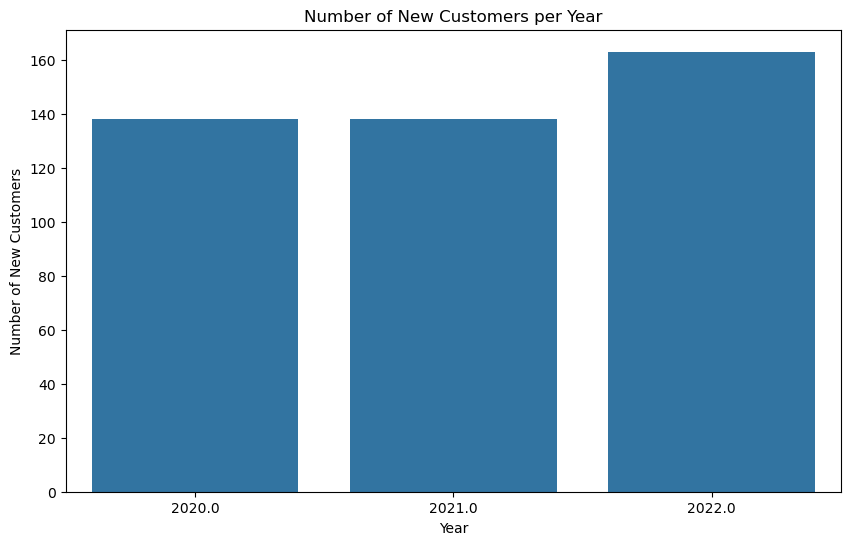

In [24]:
df_customers['joining_date'] = pd.to_datetime(df_customers['joining_date'], format='%d/%m/%Y', dayfirst=True);
df_customers['joining_year'] = df_customers['joining_date'].dt.year

plt.figure(figsize=(10, 6));
sns.countplot(data=df_customers, x='joining_year');
plt.title('Number of New Customers per Year');
plt.xlabel('Year');
plt.ylabel('Number of New Customers');
plt.show();


In [ ]:
########################################################################################################################

In [ ]:
# 5 גרף המציג כמות מכירות לפי חודשים


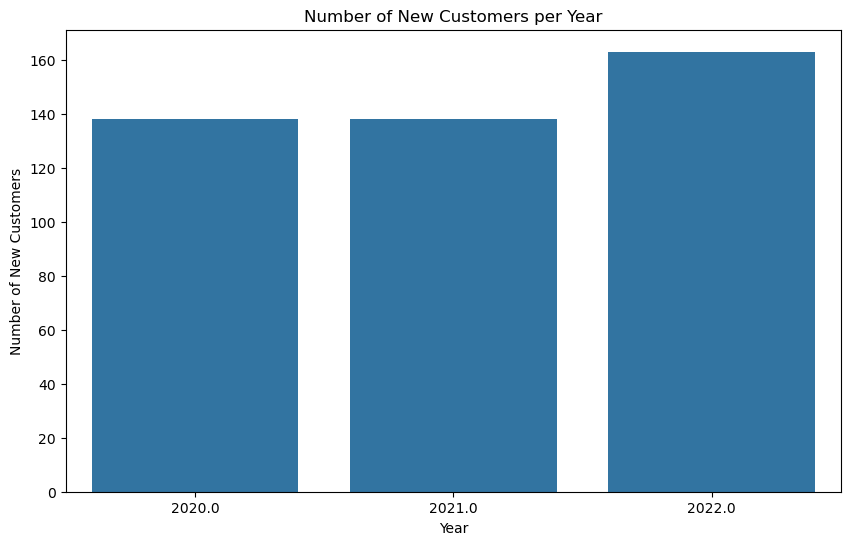

In [25]:
df_customers['joining_date'] = pd.to_datetime(df_customers['joining_date']);
df_customers['joining_date'] = df_customers['joining_date'].dt.year

plt.figure(figsize=(10, 6));
sns.countplot(data=df_customers, x='joining_date');
plt.title('Number of New Customers per Year');
plt.xlabel('Year');
plt.ylabel('Number of New Customers');
plt.show();


In [ ]:
#########################################################################################################################

In [ ]:
# 6
# ( הסטוגרמת פילוג כמות קניות לפי גיל )יש להחשיב כל קניה בספירה
# אחת. אין צורך לספור כמות מוצרים וכו'( – האם יש מגמה ליותר/פחות
# קניה בטווחי גיל מסויימים?

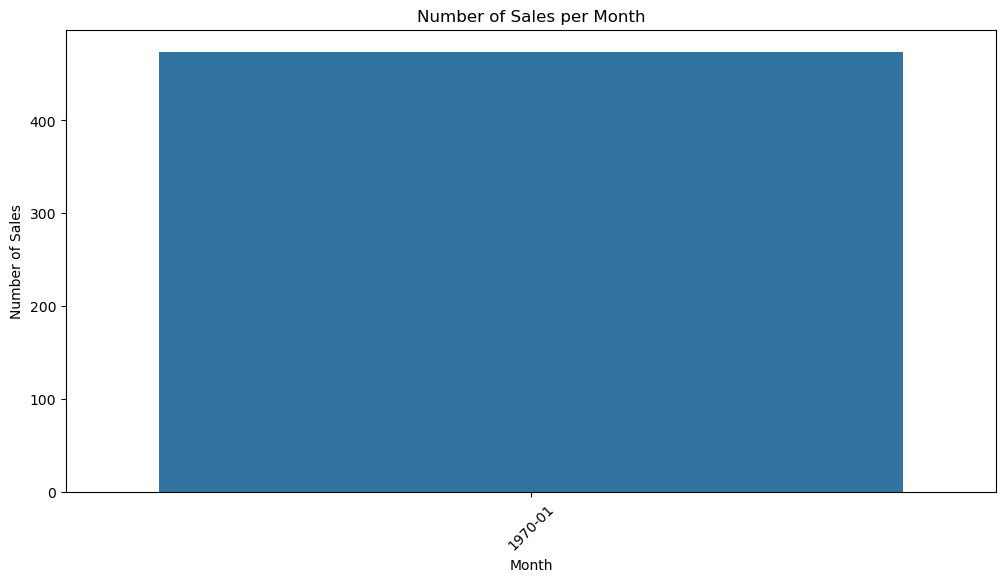

In [31]:
df_order_item['order_id'] = pd.to_datetime(df_order_item_clean['order_id']);
df_order_item['order_id'] = df_order_item['order_id'].dt.to_period('M');

plt.figure(figsize=(12, 6));
sns.countplot(data=df_order_item, x='order_id');
plt.title('Number of Sales per Month');
plt.xlabel('Month');
plt.ylabel('Number of Sales');
plt.xticks(rotation=45);
plt.show();


In [ ]:
#############################################################################################################################

In [ ]:
# 7( *אתגר: עלות קניות לפי לאום. כלומר- נסכום את סך עלות הקניות
# שנעשו לכל המוצרים עבור כל לקוח, נחבר ביחד את כל קניית הלקוחות
# מאותו לאום – ואז נראה כמה עלות יש פר לאום 

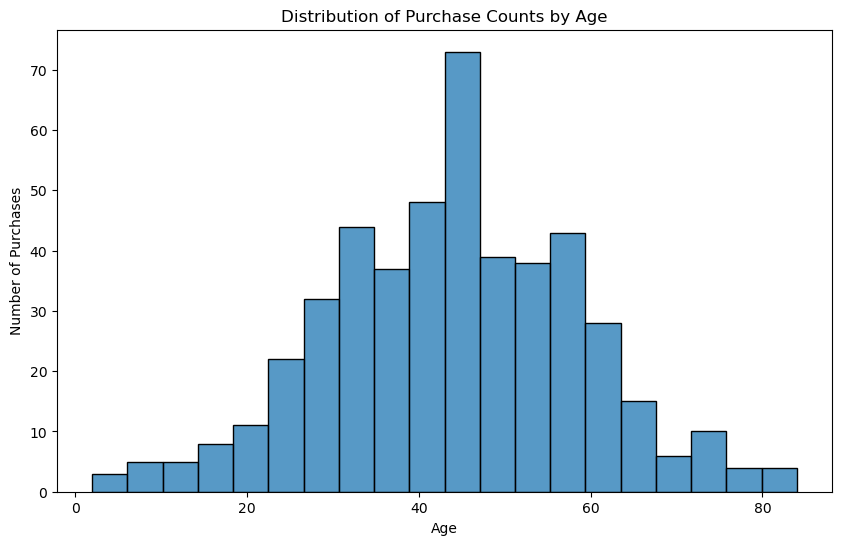

In [34]:
df_order_item = pd.merge(df_order_item, df_customers[['id', 'age']], on='id');

plt.figure(figsize=(10, 6));
sns.histplot(df_order_item['age'], bins=20, kde=False);
plt.title('Distribution of Purchase Counts by Age');
plt.xlabel('Age');
plt.ylabel('Number of Purchases');
plt.show();
